In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [4]:
raw_df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [5]:
raw_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Training, Validation and Test Sets


In [6]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]


In [7]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (101018, 23)
val_df.shape : (17885, 23)
test_df.shape : (26557, 23)


# Input and Target Columns


In [8]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [9]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [10]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [11]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [12]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [13]:
train_inputs[numeric_cols].info()


<class 'pandas.core.frame.DataFrame'>
Index: 101018 entries, 0 to 144552
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        100282 non-null  float64
 1   MaxTemp        100484 non-null  float64
 2   Rainfall       98987 non-null   float64
 3   Evaporation    62532 non-null   float64
 4   Sunshine       59010 non-null   float64
 5   WindGustSpeed  93395 non-null   float64
 6   WindSpeed9am   99564 non-null   float64
 7   WindSpeed3pm   99556 non-null   float64
 8   Humidity9am    99428 non-null   float64
 9   Humidity3pm    99514 non-null   float64
 10  Pressure9am    91218 non-null   float64
 11  Pressure3pm    91252 non-null   float64
 12  Cloud9am       63913 non-null   float64
 13  Cloud3pm       62888 non-null   float64
 14  Temp9am        99913 non-null   float64
 15  Temp3pm        100040 non-null  float64
dtypes: float64(16)
memory usage: 13.1 MB


# Imputing missing numeric values

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

#train_df[categorical_cols].fillna('Unkown', inplace= True )
#val_df[categorical_cols].fillna('Unkown', inplace= True )
#test_df[categorical_cols].fillna('Unkown', inplace= True )

train_targets=train_targets.fillna('No')
val_targets=val_targets.fillna('No')
test_targets=test_targets.fillna('No')

# Scaling Numeric Features


In [15]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# Encoding Categorical Data

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(raw_df[categorical_cols])


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [17]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))


In [18]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])



/tmp/ipykernel_19/2242855319.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_19/2242855319.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
/tmp/ipykernel_19/2242855319.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

In [19]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]



# Training and Visualizing Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, train_targets)


DecisionTreeClassifier(random_state=42)

# Evaluation ( Let's evaluate the decision tree using the accuracy score.)
 

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

train_preds = model.predict(X_train)

train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [22]:
pd.value_counts(train_preds)

No     78740
Yes    22278
Name: count, dtype: int64

In [23]:
train_probs = model.predict_proba(X_train)
train_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [24]:
accuracy_score(train_targets, train_preds)

0.9999505038705974

In [25]:
model.score(X_val, val_targets)

0.7922281241263629

# Visualization

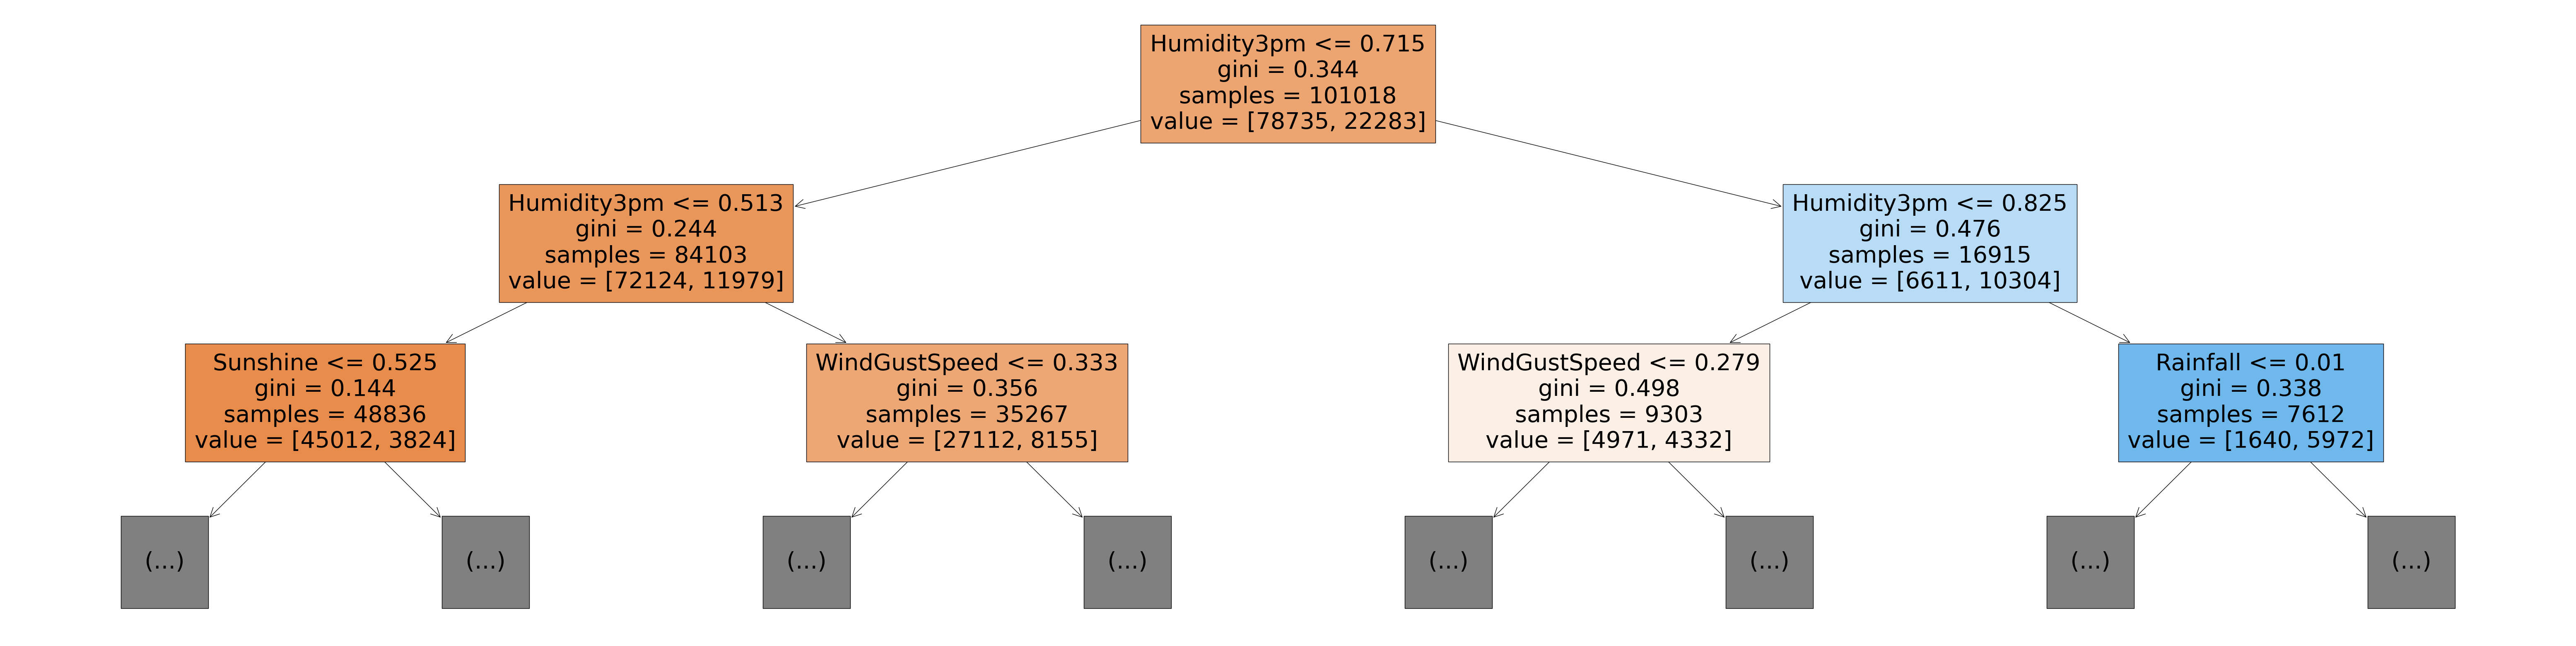

In [26]:
from sklearn.tree import plot_tree, export_text

plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [27]:
model.tree_.max_depth

45

In [28]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Humidity3pm <= 0.72
|   |--- Humidity3pm <= 0.51
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |--- Humidity3pm <= 0.24
|   |   |   |   |   |   |--- WindGustDir_N <= 0.50
|   |   |   |   |   |   |   |--- WindSpeed9am <= 0.32
|   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.06
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.06
|   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |   |--- Temp9am <= 0.65
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |   |--- Temp9am >  0.65
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |--- WindSpeed9am >  0.32
|   |   |   |   |   |   |   | 

# Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [29]:
model.feature_importances_

array([3.77370389e-02, 3.21408244e-02, 3.83128389e-02, 2.37004661e-02,
       4.67443490e-02, 6.43765145e-02, 2.71431547e-02, 3.00163972e-02,
       3.61839432e-02, 2.65843110e-01, 3.60319923e-02, 6.05038583e-02,
       1.25770567e-02, 1.92122080e-02, 3.73038439e-02, 3.16262891e-02,
       2.50673487e-03, 1.57171852e-03, 1.49681325e-03, 4.79200961e-04,
       1.83665184e-03, 1.18746740e-03, 1.28632715e-03, 1.75705903e-03,
       1.24937757e-03, 1.84184211e-03, 1.24187204e-03, 1.90675626e-03,
       1.55833365e-03, 4.42323694e-04, 8.47170656e-04, 1.96783908e-03,
       0.00000000e+00, 1.33418138e-03, 1.37075350e-03, 1.03492879e-03,
       8.38393234e-04, 1.05507921e-03, 1.64943216e-03, 1.77791031e-03,
       1.79897394e-04, 4.84020456e-04, 1.61502101e-03, 1.17689840e-03,
       1.26544856e-03, 1.54588732e-03, 6.23213294e-04, 1.36916623e-03,
       1.45395733e-03, 1.78230980e-03, 1.15032445e-03, 1.76425559e-03,
       1.20019284e-03, 1.96775437e-03, 1.15629869e-03, 2.47442489e-04,
      

In [30]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [31]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.265843
5,WindGustSpeed,0.064377
11,Pressure3pm,0.060504
4,Sunshine,0.046744
2,Rainfall,0.038313
0,MinTemp,0.037737
14,Temp9am,0.037304
8,Humidity9am,0.036184
10,Pressure9am,0.036032
1,MaxTemp,0.032141


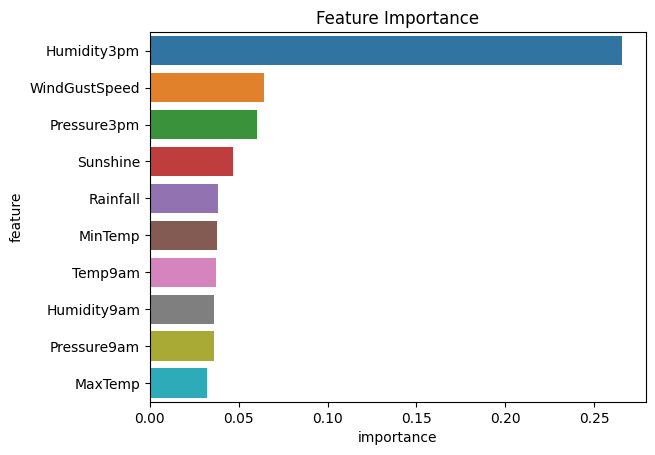

In [32]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');